# Playground / MNIST

Here we'll play with the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# check if GPU is available
print(tf.config.experimental.list_physical_devices('GPU'))

[]


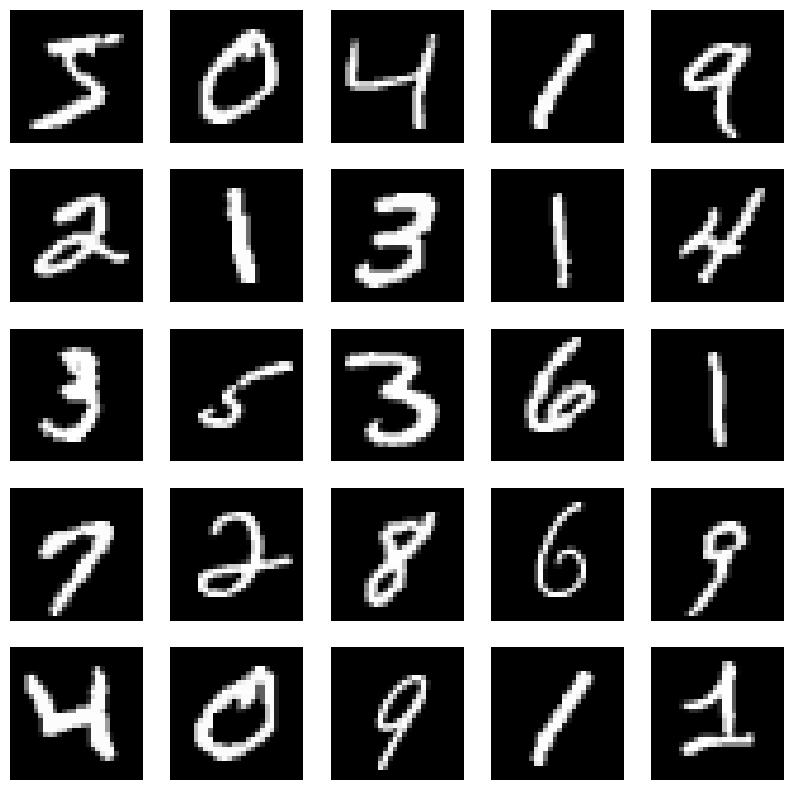

In [3]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# plot some images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
# check structure of dataset
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# flatten images, dim[1] <- dim[1] * dim[2]
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

print(train_images.shape, train_images.dtype)

(60000, 784) uint8


In [6]:
# normalize images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [7]:
# one-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# an idea of what the data looks like
# print(train_images[0])
print(train_labels[0])

train_labels.shape, test_labels.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


((60000, 10), (10000, 10))

In [ ]:
model = models.Sequential(
    [
        layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8673 - loss: 0.4514
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9649 - loss: 0.1219
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9772 - loss: 0.0745
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0499
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0376


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9758 - loss: 0.0801
0.06780114024877548 0.9787999987602234


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9920 - loss: 0.0279
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9943 - loss: 0.0217
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9960 - loss: 0.0154
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9972 - loss: 0.0115
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0084
dict_keys(['accuracy', 'loss'])


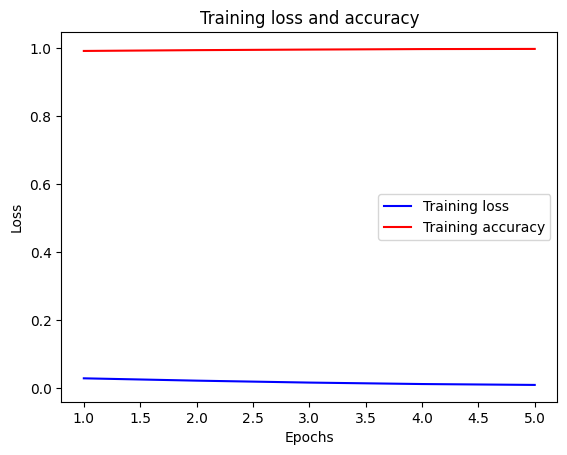

In [12]:
# a more visual way to see the training process
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()